In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, roc_curve
)
from imblearn.metrics import geometric_mean_score

In [11]:

# 1. Load Dataset
df = pd.read_csv("C:/Users/ASUS/Desktop/MINI_project/Data_p/preprocessed.csv")

# 2. Drop Unnecessary Column
df.drop(columns=["RISK_MM"], inplace=True)

# 3. Feature Selection
X = df.drop("RainTomorrow", axis=1)
y = df["RainTomorrow"].astype(int)

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
# 5. Train Model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# 6. Make Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
y_proba_full = model.predict_proba(X_test)

# 7. Evaluate Performance
acc = accuracy_score(y_test, y_pred)
prec_1 = precision_score(y_test, y_pred, pos_label=1)
prec_0 = precision_score(y_test, y_pred, pos_label=0)
rec_1 = recall_score(y_test, y_pred, pos_label=1)
rec_0 = recall_score(y_test, y_pred, pos_label=0)
f1_1 = f1_score(y_test, y_pred, pos_label=1)
f1_0 = f1_score(y_test, y_pred, pos_label=0)
gmean = geometric_mean_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

D:\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Results:
Accuracy       : 0.84
Precision (1)  : 0.70
Precision (0)  : 0.86
Recall (1)     : 0.48
Recall (0)     : 0.94
F1 Score (1)   : 0.57
F1 Score (0)   : 0.90
G-Mean         : 0.67
ROC AUC Score  : 0.85

Confusion Matrix:
[[20770  1328]
 [ 3275  3066]]


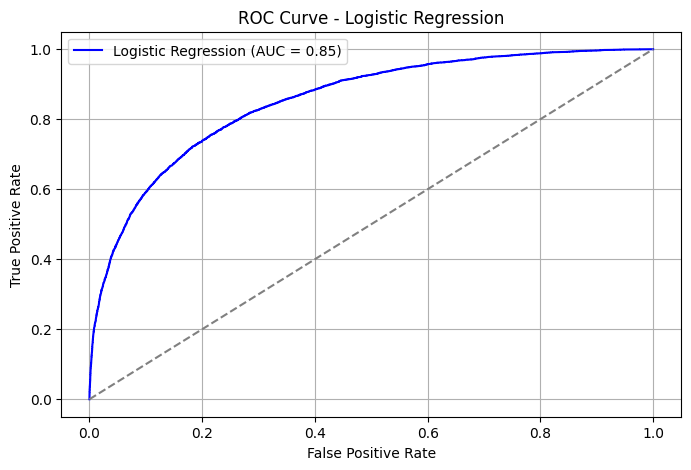

In [13]:
# 8. Print Metrics
print("Logistic Regression Results:")
print(f"Accuracy       : {acc:.2f}")
print(f"Precision (1)  : {prec_1:.2f}")
print(f"Precision (0)  : {prec_0:.2f}")
print(f"Recall (1)     : {rec_1:.2f}")
print(f"Recall (0)     : {rec_0:.2f}")
print(f"F1 Score (1)   : {f1_1:.2f}")
print(f"F1 Score (0)   : {f1_0:.2f}")
print(f"G-Mean         : {gmean:.2f}")
print(f"ROC AUC Score  : {auc:.2f}")
print("\nConfusion Matrix:")
print(cm)

# 9. Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     22098
           1       0.70      0.48      0.57      6341

    accuracy                           0.84     28439
   macro avg       0.78      0.71      0.74     28439
weighted avg       0.83      0.84      0.83     28439

